# RUN MODEL PLATFORM

In [ ]:
pip install pycaret

## Test data processing

In [ ]:
# Import the necessary libraries
import pandas as pd
import numpy as np
from pycaret.regression import load_model, predict_model
from sklearn.cluster import KMeans

# Load the saved model
saved_model = load_model('Main_Model_sept1')

# Load your new data
new_data = pd.read_csv('testset_sept1-10.csv')  # Replace 'test_rpm_sep_8.csv' with the actual file containing your new data

# Drop any unnecessary columns (same as original dataset)
#columns_to_drop = ['ID']
#new_data.drop(columns=columns_to_drop, inplace=True)

# Calculate the 'Custom_Miles' feature
#new_data['Customer RPM'] = new_data['Customer Pay'] / new_data['Miles']

# Handle missing values (drop rows with missing values)
new_data.dropna(inplace=True)

# Apply K-Means clustering to 'Miles' to create 'Miles_Cluster' (k=10)
miles_data = new_data[['Miles']]
kmeans = KMeans(n_clusters=10, random_state=0)
new_data['Miles_Cluster'] = kmeans.fit_predict(miles_data)

# Calculate 'Miles_Range' based on custom ranges
custom_ranges = [0, 100, 200, 300, 400, 500, 600, 700, 800, 1000, 2000, 4000, 10000]
new_data['Miles_Range'] = pd.cut(new_data['Miles'], bins=custom_ranges, labels=False) + 1

# Convert 'Pickup Date' to datetime data type
new_data['Pickup Date'] = pd.to_datetime(new_data['Pickup Date'])

# Extract date features for new_data
def extract_date_features(new_data):
    new_data['Year'] = new_data['Pickup Date'].dt.year
    new_data['Month'] = new_data['Pickup Date'].dt.month
    new_data['Day'] = new_data['Pickup Date'].dt.day
    new_data['Dayofweek'] = new_data['Pickup Date'].dt.dayofweek
    new_data['DayOfyear'] = new_data['Pickup Date'].dt.dayofyear
    new_data['Week'] = new_data['Pickup Date'].dt.isocalendar().week
    new_data['Quarter'] = new_data['Pickup Date'].dt.quarter
    new_data['Is_month_start'] = new_data['Pickup Date'].dt.is_month_start
    new_data['Is_month_end'] = new_data['Pickup Date'].dt.is_month_end
    new_data['Is_quarter_start'] = new_data['Pickup Date'].dt.is_quarter_start
    new_data['Is_quarter_end'] = new_data['Pickup Date'].dt.is_quarter_end
    new_data['Is_year_start'] = new_data['Pickup Date'].dt.is_year_start
    new_data['Is_year_end'] = new_data['Pickup Date'].dt.is_year_end
    new_data['Semester'] = np.where(new_data['Quarter'].isin([1, 2]), 1, 2)
    new_data['Is_weekend'] = np.where(new_data['Dayofweek'].isin([5, 6]), 1, 0)
    new_data['Is_weekday'] = np.where(new_data['Dayofweek'].isin([0, 1, 2, 3, 4]), 1, 0)
    new_data['Days_in_month'] = new_data['Pickup Date'].dt.days_in_month
    return new_data

new_data = extract_date_features(new_data)

# Create new features: LANE and LANE_KMA
new_data['LANE'] = new_data['Origin City'] + ', ' + new_data['Origin State'] + ' - ' + new_data['Delivery City'] + ', ' + new_data['Delivery State']

# Combine 'Origin KMA' and 'Delivery KMA' into 'LANE_KMA' and treat it as categorical
new_data['LANE_KMA'] = new_data['Origin KMA'] + ' - ' + new_data['Delivery KMA']

# Make predictions on the new data
predictions = predict_model(saved_model, data=new_data)

# Display only the selected columns
"""selected_columns = ['Miles', 'Customer Pay', 'Customer RPM',
'Miles_Cluster', 'Miles_Range', 'Pickup Date', 'Year',
'Month', 'Day', 'Dayofweek', 'DayOfyear', 'Week', 'Quarter',
'Is_month_start', 'Is_month_end', 'Is_quarter_start', 'Is_quarter_end',
'Is_year_start', 'Is_year_end', 'Semester', 'Is_weekend', 'Is_weekday',
'Days_in_month', 'LANE', 'LANE_KMA', 'Label']  # Include the columns you want to display
selected_data = predictions[selected_columns]"""

# Rename the 'Label' column to 'Predicted RPM'
predictions = predictions.rename(columns={'prediction_label': 'Predicted RPM'})

# Select only the original features and the predicted 'Label'
selected_columns = ['ID', 'Pickup Date', 'Origin City', 'Origin State', 'Delivery City',
       'Delivery State', 'Origin KMA', 'Delivery KMA', 'Lead Band', 'Miles',
       'Customer Pay', 'RPM']  # Replace with the names of your original features

selected_columns.append('Predicted RPM')
predictions = predictions[selected_columns]

# Display the DataFrame
predictions.head(10)


Transformation Pipeline and Model Successfully Loaded


,ID,Pickup Date,Origin City,Origin State,Delivery City,Delivery State,Origin KMA,Delivery KMA,Lead Band,Miles,Customer Pay,RPM,Predicted RPM
0,109,2023-09-08,GLOVERSVILLE ...,NY,JOHNSTOWN ...,NY,"ALBANY, NY","ALBANY, NY",< 24 Hours,6,410.660004,62.50,78.428499
1,110,2023-09-08,GLOVERSVILLE ...,NY,JOHNSTOWN ...,NY,"ALBANY, NY","ALBANY, NY",< 24 Hours,6,410.660004,62.50,78.428499
2,97,2023-09-08,LINCOLNSHIRE ...,IL,JACKSON ...,MS,"CHICAGO, IL","JACKSON, MS",1 Day,757,1733.760010,2.29,2.326900
3,103,2023-09-08,VIDALIA ...,LA,GREENWOOD ...,MS,"SHREVEPORT, LA","JACKSON, MS",< 24 Hours,178,850.000000,3.37,4.513200
4,108,2023-09-08,VIDALIA ...,LA,GREENWOOD ...,MS,"SHREVEPORT, LA","JACKSON, MS",< 24 Hours,178,850.000000,4.21,4.512400
5,Fake_1,2023-09-08,GREENWOOD ...,MS,VIDALIA ...,LA,"JACKSON, MS","SHREVEPORT, LA",< 24 Hours,178,850.000000,4.21,4.467100
6,Fake_2,2023-09-08,GREENWOOD ...,MS,VIDALIA ...,LA,"SHREVEPORT, LA","JACKSON, MS",< 24 Hours,178,850.000000,4.21,4.392400
7,85,2023-09-07,CONSTANTINE ...,MI,SPRINGFIELD ...,MO,"GRAND RAPIDS, MI","JOPLIN, MO",< 24 Hours,602,1601.439941,2.66,2.308200
8,90,2023-09-07,ALABASTER ...,AL,OLIVE BRANCH ...,MS,"BIRMINGHAM, AL","MEMPHIS, TN",< 24 Hours,234,949.919983,3.42,3.389200
9,88,2023-09-07,CONYERS ...,GA,CLINTON ...,MS,"ATLANTA, GA","JACKSON, MS",< 24 Hours,416,1200.000000,2.52,2.515300


# Saving the result file

In [ ]:
predictions.to_csv('Results_sept1-1.csv')

# Mean and Median comparison

In [ ]:
import pandas as pd

# Assuming 'predictions' is your DataFrame
columns_to_calculate = ['RPM', 'Predicted RPM', 'Miles', 'Customer Pay']

# Calculate mean and median for specified columns
mean_values = predictions[columns_to_calculate].mean()
median_values = predictions[columns_to_calculate].median()

# Round the values to two decimal places
mean_values = mean_values.round(2)
median_values = median_values.round(2)

# Create a DataFrame to display the results
summary_df = pd.DataFrame({'Mean': mean_values, 'Median': median_values})

# Display the summary DataFrame
print(summary_df)


                  Mean   Median
RPM               6.45     2.85
Predicted RPM     6.69     2.72
Miles           442.54   360.50
Customer Pay   1255.52  1071.01


## Visualize Predicted and Actual values of RPM

In [ ]:
import seaborn as sns
pd.options.plotting.backend = "plotly"
predictions[['RPM', 'Predicted RPM']].plot(kind='line', title='GR: RPM vs Predicted RPM')
#fig.add_scatter(x=df_test['Miles'], y=df_test['Label'], mode='lines')

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

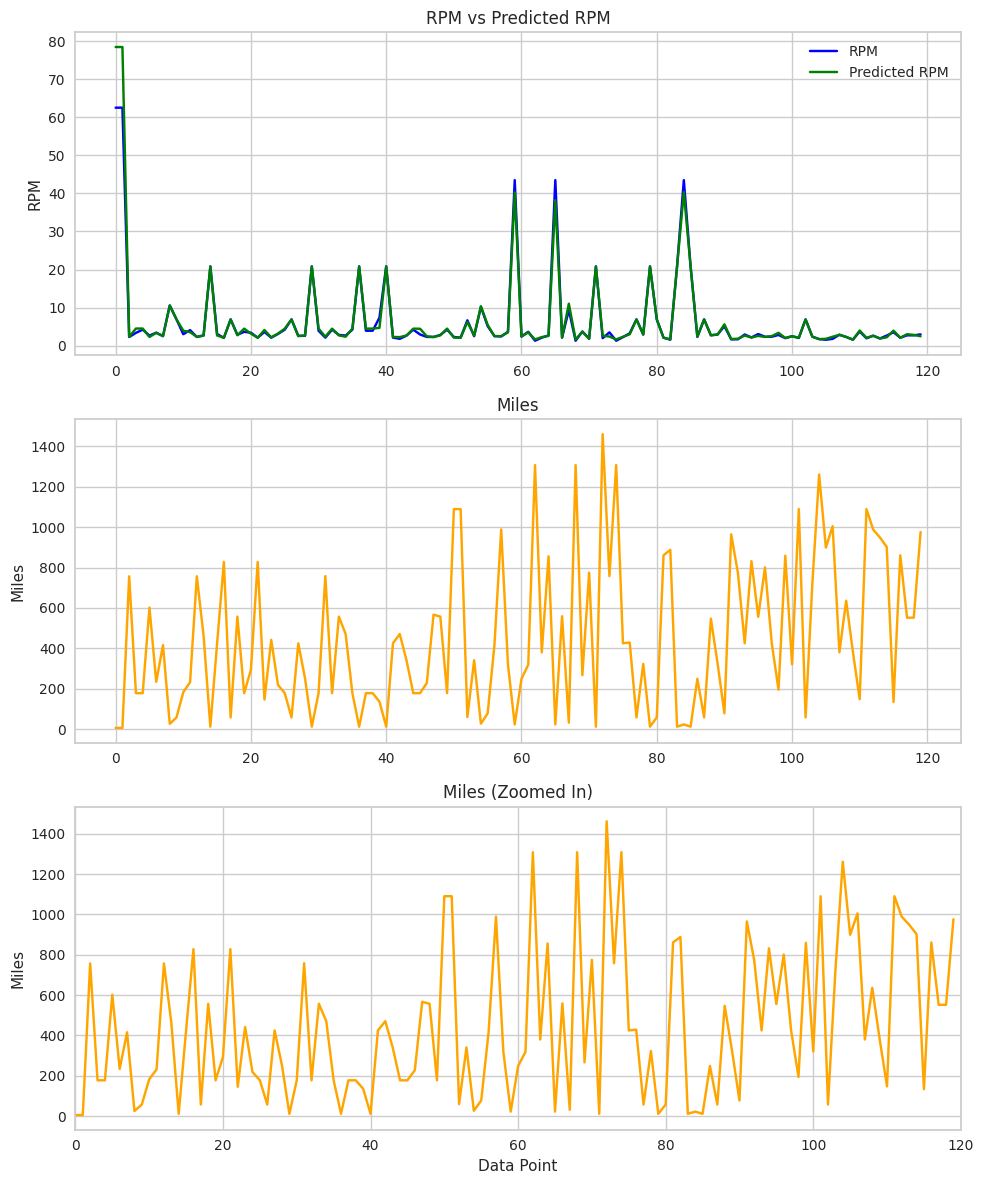

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'predictions' is your DataFrame

# Create a figure with subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 12))

# Plot RPM vs. Predicted RPM
axs[0].plot(predictions.index, predictions['RPM'], label='RPM', color='blue')
axs[0].plot(predictions.index, predictions['Predicted RPM'], label='Predicted RPM', color='green')
axs[0].set_title('RPM vs Predicted RPM')
axs[0].set_ylabel('RPM')
axs[0].legend()

# Plot Miles
axs[1].plot(predictions.index, predictions['Miles'], label='Miles', color='orange')
axs[1].set_title('Miles')
axs[1].set_ylabel('Miles')

# Plot Miles (zoomed in)
axs[2].plot(predictions.index, predictions['Miles'], label='Miles', color='orange')
axs[2].set_title('Miles (Zoomed In)')
axs[2].set_xlabel('Data Point')
axs[2].set_ylabel('Miles')
axs[2].set_xlim(0, len(predictions))  # Adjust the x-axis limits for zooming

plt.tight_layout()
plt.show()


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

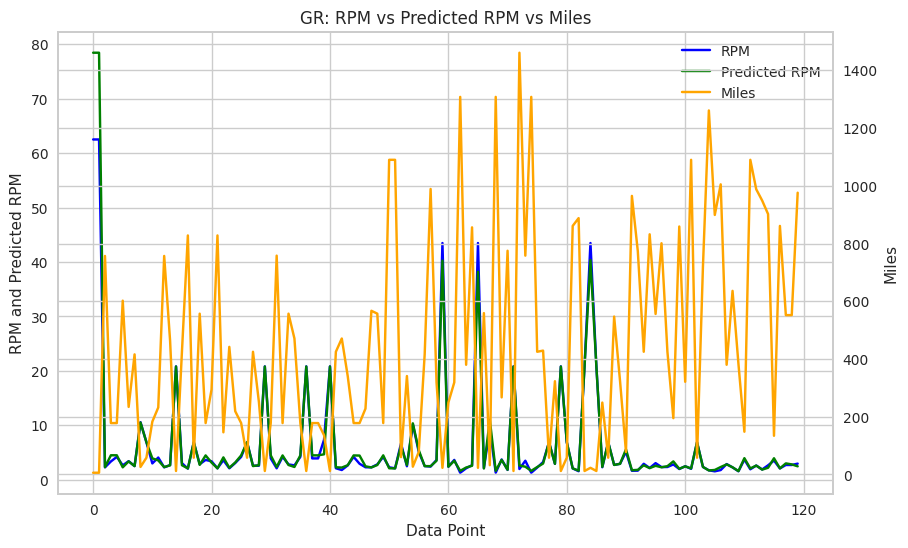

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'predictions' is your DataFrame

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot RPM and Predicted RPM on the primary y-axis
ax1.plot(predictions.index, predictions['RPM'], label='RPM', color='blue')
ax1.plot(predictions.index, predictions['Predicted RPM'], label='Predicted RPM', color='green')
ax1.set_xlabel('Data Point')
ax1.set_ylabel('RPM and Predicted RPM')
ax1.set_title('GR: RPM vs Predicted RPM vs Miles')
ax1.legend(loc='upper left')

# Create a secondary y-axis for Miles
ax2 = ax1.twinx()
ax2.plot(predictions.index, predictions['Miles'], label='Miles', color='orange')
ax2.set_ylabel('Miles')

# Combine legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
ax1.legend(lines, labels, loc='upper right')

plt.show()


In [ ]:
import plotly.express as px

# Specify a font family available on your system
font_family = 'Arial'  # You can change this to a different font

# Create a figure with the specified font family
fig = px.line(predictions, x=predictions.index, y=['RPM', 'Predicted RPM', 'Miles'], title='GR: RPM vs Predicted RPM vs Miles')

# Add a secondary y-axis for 'Miles'
fig.add_trace(px.line(predictions, x=predictions.index, y='Miles').data[0])

# Update y-axis labels
fig.update_yaxes(title_text="RPM and Predicted RPM", secondary_y=False)
fig.update_yaxes(title_text="Miles", secondary_y=True)

# Specify the font family for the plot
fig.update_layout(font=dict(family=font_family))

# Show the plot
fig.show()
